In [9]:
import torch
import torchvision


In [78]:
model = torchvision.models.inception_v3(weights="Inception_V3_Weights.IMAGENET1K_V1").to("cuda")

In [79]:
target_class = 107
input_image = torch.randn(1, 3, 299, 299).to("cuda")

In [80]:
input_image = input_image.detach().clone()
input_image.requires_grad_(True)
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

model.eval()
for i in range(10000):
    output = model(input_image)
    loss = -output[0, target_class]
    loss.backward()
    with torch.no_grad():
        input_image += 0.1 * input_image.grad
        input_image.clamp_(0, 1)
    input_image.grad.zero_()
    writer.add_scalar("Score", loss.item(), i)
    if i % 100 == 0:
        print(f"Iteration {i}, Loss: {loss.item()}")

2025-02-09 18:45:38.276628: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-09 18:45:38.368371: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-09 18:45:38.405389: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-09 18:45:38.416170: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-09 18:45:38.486549: I tensorflow/core/platform/cpu_feature_guar

Iteration 0, Loss: -1.4319742918014526
Iteration 100, Loss: 8.607357025146484
Iteration 200, Loss: 14.473563194274902
Iteration 300, Loss: 19.69618034362793
Iteration 400, Loss: 23.174474716186523
Iteration 500, Loss: 26.342254638671875
Iteration 600, Loss: 27.822866439819336
Iteration 700, Loss: 29.920787811279297
Iteration 800, Loss: 30.649574279785156
Iteration 900, Loss: 33.410179138183594
Iteration 1000, Loss: 35.22993850708008
Iteration 1100, Loss: 37.004825592041016
Iteration 1200, Loss: 38.0240592956543
Iteration 1300, Loss: 40.10021209716797
Iteration 1400, Loss: 41.388145446777344
Iteration 1500, Loss: 41.63072967529297
Iteration 1600, Loss: 42.94670486450195
Iteration 1700, Loss: 44.03886413574219
Iteration 1800, Loss: 43.330848693847656
Iteration 1900, Loss: 44.29108428955078
Iteration 2000, Loss: 46.780845642089844
Iteration 2100, Loss: 47.08131790161133
Iteration 2200, Loss: 46.67353439331055
Iteration 2300, Loss: 47.49808883666992
Iteration 2400, Loss: 47.96194839477539


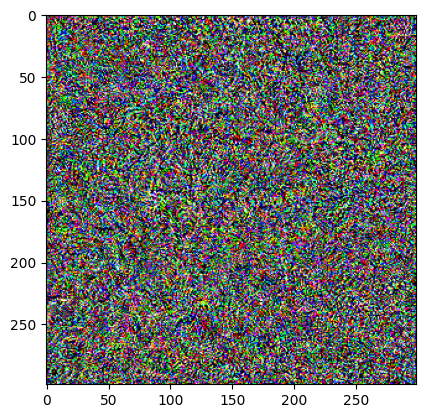

In [81]:
import matplotlib.pyplot as plt

plt.imshow(input_image[0].detach().cpu().permute(1, 2, 0).numpy())
plt.show()